In [38]:
from matplotlib.pyplot import imread, imshow, imsave
import numpy as np
from sklearn.cluster import KMeans

In [22]:
cat = imread('datasets/cat.png')

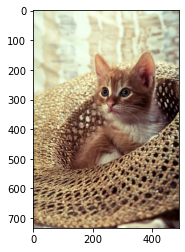

In [37]:
imshow(cat)

In [8]:
np.shape(cat)

(733, 490, 3)

In [9]:
cat_2D = cat.reshape((cat.shape[0]*cat.shape[1]), cat.shape[2])
np.shape(cat_2D)

(359170, 3)

In [11]:
kmeans = KMeans(n_clusters=10,tol=0.01,random_state=0)
cluster_cat_2D = kmeans.fit_predict(cat_2D)

In [15]:
np.shape(kmeans.cluster_centers_)

(10, 3)

In [19]:
kmeans.cluster_centers_

array([[0.56997055, 0.4325105 , 0.335141  ],
       [0.9216972 , 0.9571897 , 0.8532584 ],
       [0.27033356, 0.14671177, 0.11622894],
       [0.73567414, 0.64028966, 0.4879344 ],
       [0.48129898, 0.3400523 , 0.26874518],
       [0.8665883 , 0.86402357, 0.72169393],
       [0.11174518, 0.04502392, 0.03000262],
       [0.6541181 , 0.5311675 , 0.40723374],
       [0.8021619 , 0.75456977, 0.59939265],
       [0.38406083, 0.24317688, 0.19472015]], dtype=float32)

In [16]:
np.shape(kmeans.labels_)

(359170,)

In [17]:
kmeans.labels_

array([8, 1, 5, ..., 9, 9, 9], dtype=int32)

In [33]:
columns = np.shape(cat_2D)[1]
rows = np.shape(cat_2D)[0]
cat_2D_new = cat_2D

for c in range(columns):
    for r in range(rows):
        label = kmeans.labels_[r]
        center = kmeans.cluster_centers_[label,c]
        cat_2D_new[r,c] = center
        

In [35]:
cat_3D_new = cat_2D_new.reshape(cat.shape[0],cat.shape[1],cat.shape[2])

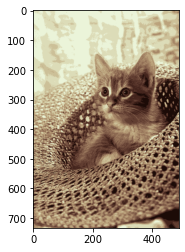

In [36]:
imshow(cat_3D_new)

In [39]:
imsave('datasets/compressed_cat.png',cat_3D_new)